## PROCESAMIENTO DE LENJUAJE NATURAL
## MAESTRIA EN ANALITICA DE DATOS

TAREA 1

Presentado po:

1- Diagrama de flujo que muestre el proceso de limpieza y procesamiento

    1. Mostrar en que momento elimino palabras vacias
    2. Si fue necesario identificar patrones
    3. Cada paso debe estar indicado en el diagrama
2- Un cuaderno con el proceso previamente eleborado

3- La nube por cada noticia seleccionada, indique para usted cual fue la que mejor proceso la información.

4. ¿Su nube de palabras logró resumir la información de esa notticia?

In [123]:
!pip install numpy
!pip install wordcloud
!pip install stop-words

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached stop-words-2018.7.23.tar.gz (31 kB)
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=b22732130c05907ba3db7d423dd9f9594a39c83940158bfd550fd7cfec542688
  Stored in directory: c:\users\trono\appdata\local\pip\cache\wheels\da\d8\66\395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words


In [124]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator

## __Metodología__

Se propone una metodología que cubre varias fases que son:

1. __Inspección:__ detecta datos inesperados, incorrectos e inconsistentes.
1. __Limpieza:__ corrige o elimina las anomalías descubiertas.
1. __Tratamiento de datos faltantes:__ se decide si se marcan, se les asigna un valor o se eliminan
1. __Verificación:__ Después de la limpieza, los resultados se inspeccionan para verificar la corrección.
1. __Informes:__ se registra un informe sobre los cambios realizados y la calidad de los datos almacenados procesados.

In [86]:
dfe = pd.read_excel('Noticias1ver.xlsx')

In [87]:
dfe.head()

,Unnamed: 0,Título,info,contenido
0,0,¿Cómo potencializar las ventas de un emprendim...,La época de crisis de salud por coronavirus es...,En medio de la coyuntura ocasionada por la pro...
1,1,Así apoyará Corea del Sur al país para enfrent...,El Presidente aseguró que ya le han devuelto e...,"Este jueves, en el noveno día de cuarentena na..."
2,2,"Nanotecnología, una receta para cultivos más s...",Los resultados están acompañados del llamado d...,Jenny Prieto y Álex Caro son una pareja de cul...
3,3,"Desorden de padres, causa de nueva jornada de ...",Secretaría de Educación insiste en que se lleg...,Aunque la Secretaría de Educación les recomend...
4,4,"Senado, citado para el 13 de abril, cuando ter...","Así lo anunció el presidente del Senado, Lidio...","El presidente del Congreso, Lidio García, anun..."


### 1. Buscando las palabras vacias

In [88]:
#renombrando columnas
df = dfe.rename(columns={'Unnamed: 0':'indice'})

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   indice     882 non-null    int64 
 1   Título     878 non-null    object
 2   info       800 non-null    object
 3   contenido  860 non-null    object
dtypes: int64(1), object(3)
memory usage: 27.7+ KB


In [90]:
#buscando valores nulos

print('Columnas \t tipo\túnicos\tnulos')
print('--'*20)
for col in df.columns.to_list():
    print('%s:    \t%s\t%3d/%d\t%2d\t'%(col, df[col].dtype, len(df[col].unique()),len(df),len(df[df[col].isnull()])))

Columnas 	 tipo	únicos	nulos
----------------------------------------
indice:    	int64	882/882	 0	
Título:    	object	864/882	 4	
info:    	object	801/882	82	
contenido:    	object	861/882	22	


In [91]:
df.columns

Index(['indice', 'Título', 'info', 'contenido'], dtype='object')

In [92]:
df['Título'].unique()

array(['¿Cómo potencializar las ventas de un emprendimiento en la  cuarentena?',
       'Así apoyará Corea del Sur al país para enfrentar crisis por covid-19',
       'Nanotecnología, una receta para cultivos más sanos',
       'Desorden de padres, causa de nueva jornada de largas filas',
       'Senado, citado para el 13 de abril, cuando termina la cuarentena',
       'La violencia intrafamiliar, el único delito que crece en Bogotá',
       'Clases virtuales, manzana de la discordia en universidades',
       'Así es vivir la cuarentena siendo claustrofóbico',
       'Pequeños y medianos empresarios de turismo lanzan SOS',
       '‘Pico y cédula’ en Colombia: ciudades donde aplica la medida',
       'Ya son más de un millón los contagiados en el mundo por coronavirus',
       'La hora del médico general',
       '‘El que embistió fue barco de la Marina venezolana’, dice Portugal',
       'En mal momento', 'Relevo en la Procuraduría',
       'El epidemiólogo que le hace contrapeso a Tru

In [93]:
#buscando vacios

df.isna()

,indice,Título,info,contenido
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
877,False,False,True,False
878,False,False,True,False
879,False,False,True,False
880,False,False,True,False


In [94]:
df[df['indice'] >= 877]

,indice,Título,info,contenido
877,877,Pensar lo impensable,NaN,Estamos viviendo una situación totalmente impe...
878,878,El médico loco,NaN,El doctor Didier Raoult tiene pinta de científ...
879,879,No entiendo este ‘indictment’,NaN,Por lo menos con diez años de tardanza se prod...
880,880,¿Virus y/o hambre?,NaN,Llevo más de 15 días de cuarentena. Me aislé a...
881,881,Seamos realistas,NaN,Todos los análisis realizados por expertos epi...


In [95]:
dfnull = df.isna()

In [96]:
dfnull

,indice,Título,info,contenido
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
877,False,False,True,False
878,False,False,True,False
879,False,False,True,False
880,False,False,True,False


In [97]:
#buscando solo los vacios en el campo Título
dfnull[dfnull['Título']] == True

,indice,Título,info,contenido
192,False,True,True,True
395,False,True,True,True
593,False,True,True,True
794,False,True,True,True


In [98]:
#Revisando el contenido se muestra lainformación vacia
df[df['indice'] == 794] 

#de acuerdo a la revisión, estos 4 registros se deben eleminar debio aque la información es nula

,indice,Título,info,contenido
794,794,NaN,NaN,NaN


In [99]:
#buscando solo los vacios en el campo info
dfnull[dfnull['info']] == True

,indice,Título,info,contenido
11,False,False,True,False
13,False,False,True,False
14,False,False,True,False
18,False,False,True,False
19,False,False,True,False
...,...,...,...,...
877,False,False,True,False
878,False,False,True,False
879,False,False,True,False
880,False,False,True,False


In [100]:
#Revisando el contenido se muestra lainformación vacia
df[df['indice'] == 877] 

#de acuerdo a la revisión, estos 82 registros se deben eleminar debio aque la información es nula

,indice,Título,info,contenido
877,877,Pensar lo impensable,NaN,Estamos viviendo una situación totalmente impe...


In [101]:
#buscando solo los vacios en el campo contenido
dfnull[dfnull['contenido']] == True

,indice,Título,info,contenido
32,False,False,True,True
33,False,False,True,True
35,False,False,True,True
192,False,True,True,True
239,False,False,True,True
240,False,False,True,True
241,False,False,True,True
395,False,True,True,True
452,False,False,True,True
453,False,False,True,True


In [102]:
#Revisando el contenido se muestra lainformación vacia
df[df['indice'] == 794] 

#de acuerdo a la revisión, estos 22 registros se deben mantener debido a que el campo no es relevante 

,indice,Título,info,contenido
794,794,NaN,NaN,NaN


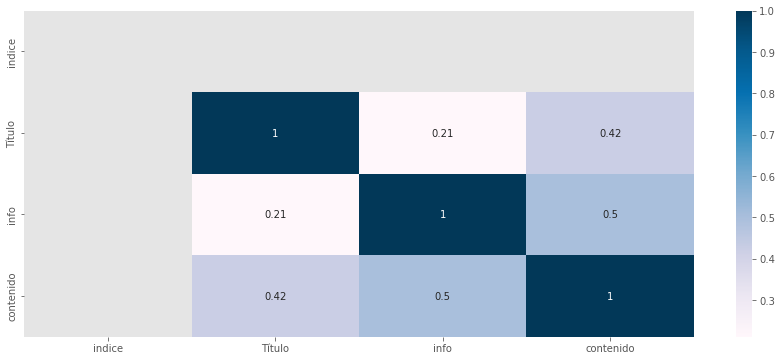

In [103]:
## Primero observemos la matriz de correlaciones lineales
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')
sns.heatmap(dfnull.corr(), annot=True, cmap="PuBu")
plt.show()

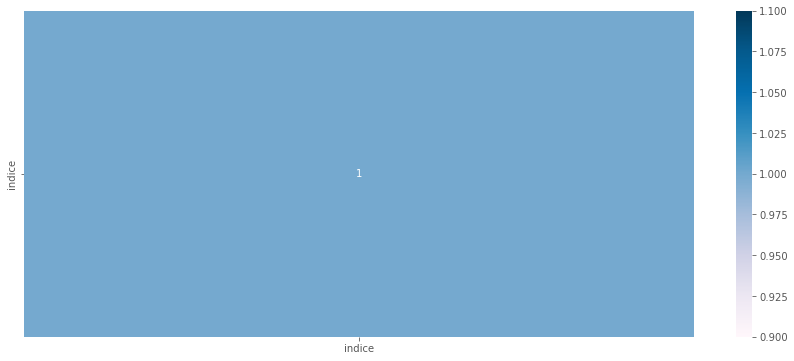

In [104]:
## Primero observemos la matriz de correlaciones lineales
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')
sns.heatmap(df.corr(), annot=True, cmap="PuBu")
plt.show()

In [105]:
for col in dfnull.columns.to_list():
    print(col, ':  \t',  len(dfnull[col].unique()), '\t', len(dfnull[dfnull[col].isnull()]))

indice :  	 1 	 0
Título :  	 2 	 0
info :  	 2 	 0
contenido :  	 2 	 0


In [106]:
for col in df.columns.to_list():
    print(col, ':  \t',  len(df[col].unique()), '\t', len(df[df[col].isnull()]))

indice :  	 882 	 0
Título :  	 864 	 4
info :  	 801 	 82
contenido :  	 861 	 22


In [112]:
#eliminacion

dfnull[dfnull['Título'] == True]

,indice,Título,info,contenido
192,False,True,True,True
395,False,True,True,True
593,False,True,True,True
794,False,True,True,True


In [108]:
#Se eliminan los registros de la fila Título
df1 = df[df['Título'].notna()]

In [118]:
for col in df1.columns.to_list():
    print(col, ':  \t',  len(df1[col].unique()), '\t', len(df1[df1[col].isnull()]))

indice :  	 878 	 0
Título :  	 863 	 0
info :  	 801 	 78
contenido :  	 861 	 18


In [116]:
#eliminacion

dfnull[dfnull['contenido'] == True]

,indice,Título,info,contenido
32,False,False,True,True
33,False,False,True,True
35,False,False,True,True
192,False,True,True,True
239,False,False,True,True
240,False,False,True,True
241,False,False,True,True
395,False,True,True,True
452,False,False,True,True
453,False,False,True,True


In [117]:
#Se eliminan los registros de la fila Título
df2 = df[df['contenido'].notna()]

In [119]:
for col in df2.columns.to_list():
    print(col, ':  \t',  len(df2[col].unique()), '\t', len(df2[df2[col].isnull()]))

indice :  	 860 	 0
Título :  	 859 	 0
info :  	 801 	 60
contenido :  	 860 	 0


In [121]:
#buscando valores nulos

print('Columnas \t tipo\túnicos\tnulos')
print('--'*20)
for col in df2.columns.to_list():
    print('%s:    \t%s\t%3d/%d\t%2d\t'%(col, df2[col].dtype, len(df2[col].unique()),len(df2),len(df2[df2[col].isnull()])))

Columnas 	 tipo	únicos	nulos
----------------------------------------
indice:    	int64	860/860	 0	
Título:    	object	859/860	 0	
info:    	object	801/860	60	
contenido:    	object	860/860	 0	


### Haciendo la nube de noticias

In [ ]:
#Word Cloud

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Texto1paradic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [125]:
df2

,indice,Título,info,contenido
0,0,¿Cómo potencializar las ventas de un emprendim...,La época de crisis de salud por coronavirus es...,En medio de la coyuntura ocasionada por la pro...
1,1,Así apoyará Corea del Sur al país para enfrent...,El Presidente aseguró que ya le han devuelto e...,"Este jueves, en el noveno día de cuarentena na..."
2,2,"Nanotecnología, una receta para cultivos más s...",Los resultados están acompañados del llamado d...,Jenny Prieto y Álex Caro son una pareja de cul...
3,3,"Desorden de padres, causa de nueva jornada de ...",Secretaría de Educación insiste en que se lleg...,Aunque la Secretaría de Educación les recomend...
4,4,"Senado, citado para el 13 de abril, cuando ter...","Así lo anunció el presidente del Senado, Lidio...","El presidente del Congreso, Lidio García, anun..."
...,...,...,...,...
877,877,Pensar lo impensable,NaN,Estamos viviendo una situación totalmente impe...
878,878,El médico loco,NaN,El doctor Didier Raoult tiene pinta de científ...
879,879,No entiendo este ‘indictment’,NaN,Por lo menos con diez años de tardanza se prod...
880,880,¿Virus y/o hambre?,NaN,Llevo más de 15 días de cuarentena. Me aislé a...


In [238]:
df3 = df2[['indice','Título']]


busca = 'olombia'
lista = []
noticia = ''
for i in range(df2.shape[0]):
    if i <= 10:
        #print(i)
        lista.append(df3[df3['indice']== i])
        noticia = lista[i]
        #resul = re.findall(busca,noticia)   
        print(noticia)
    #print(resul)

   indice                                             Título
0       0  ¿Cómo potencializar las ventas de un emprendim...
   indice                                             Título
1       1  Así apoyará Corea del Sur al país para enfrent...
   indice                                             Título
2       2  Nanotecnología, una receta para cultivos más s...
   indice                                             Título
3       3  Desorden de padres, causa de nueva jornada de ...
   indice                                             Título
4       4  Senado, citado para el 13 de abril, cuando ter...
   indice                                             Título
5       5  La violencia intrafamiliar, el único delito qu...
   indice                                             Título
6       6  Clases virtuales, manzana de la discordia en u...
   indice                                            Título
7       7  Así es vivir la cuarentena siendo claustrofóbico
   indice                 

In [239]:
lista[10]


,indice,Título
10,10,Ya son más de un millón los contagiados en el ...


In [243]:
print(noticia)

    indice                                             Título
10      10  Ya son más de un millón los contagiados en el ...


In [148]:
busca = 'olombia'

for i in range(df2.shape[0]):
    print(i)
    #print(resul)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [176]:
busca = 'olombia'

noticia = 'Colombianos en Ginebra se quejan de abandono de misión diplomática'
result = re.match(busca,noticia)  
if result:
  print("Search successful.")
else:
  print("Search unsuccessful.")	

Search unsuccessful.


In [181]:
busca = 'olombia'

noticia = 'Colombianos en Ginebra se quejan de abandono de misión diplomática'
re.findall(busca,noticia)

['olombia']

In [201]:
noticia = df2[df2['indice']==4]
noticia

,indice,Título,info,contenido
4,4,"Senado, citado para el 13 de abril, cuando ter...","Así lo anunció el presidente del Senado, Lidio...","El presidente del Congreso, Lidio García, anun..."


In [203]:
noti1 = df2['Título']

In [204]:
noti1

0      ¿Cómo potencializar las ventas de un emprendim...
1      Así apoyará Corea del Sur al país para enfrent...
2      Nanotecnología, una receta para cultivos más s...
3      Desorden de padres, causa de nueva jornada de ...
4      Senado, citado para el 13 de abril, cuando ter...
                             ...                        
877                                 Pensar lo impensable
878                                       El médico loco
879                        No entiendo este ‘indictment’
880                                   ¿Virus y/o hambre?
881                                     Seamos realistas
Name: Título, Length: 860, dtype: object